In [1]:
import os
import librosa
import numpy as np
import pickle
import time

# Define the path to the directory containing the audio files
directory_path = './Emo-soundscapes'

# Initialize an empty list to store the buffers and their MFCCs
buffers = []

# Walk through the directory, including all subdirectories
for root, _, files in os.walk(directory_path):
    for filename in files:
        if filename.endswith(".wav") or filename.endswith(".mp3"):
            # Construct the full file path
            file_path = os.path.join(root, filename)
            
            # Load the audio file
            audio_data, sample_rate = librosa.load(file_path, sr=None)
            
            # Append the buffer and MFCCs to the lists
            buffers.append((audio_data, sample_rate))
            time.sleep(0.01)

# Save buffers to a file using pickle
with open('buffers.pkl', 'wb') as f:
    pickle.dump(buffers, f)
    
print("Buffers have been saved to buffers.pkl respectively.")


Buffers have been saved to buffers.pkl respectively.


Loaded buffers and spectral centroids from pickle files.


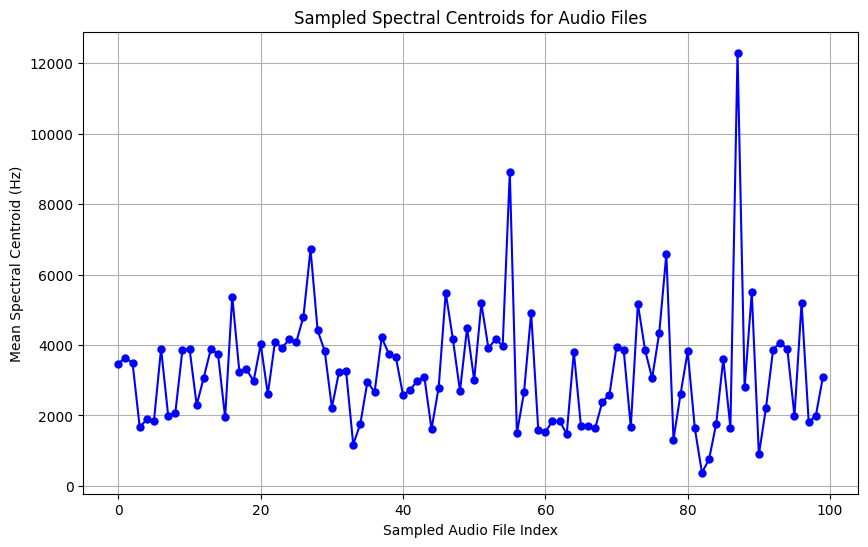

In [6]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Define the path to the directory containing the audio files

# Check if centroids_list is empty
if not centroids_list:
    print("No valid audio files found or processed.")
else:
    # Convert the list of spectral centroids to a NumPy array
    centroids_array = np.array(centroids_list).reshape(-1, 1)

    # Optional: Reduce the number of data points by sampling
    sample_size = min(100, len(centroids_array))  # Limit to 100 samples
    indices = np.linspace(0, len(centroids_array) - 1, sample_size).astype(int)
    sampled_centroids = centroids_array[indices]

    # Plotting the sampled spectral centroids
    plt.figure(figsize=(10, 6))
    plt.plot(sampled_centroids, marker='o', linestyle='-', color='b', markersize=5)
    plt.title('Sampled Spectral Centroids for Audio Files')
    plt.xlabel('Sampled Audio File Index')
    plt.ylabel('Mean Spectral Centroid (Hz)')
    plt.grid(True)
    plt.show()


Processed file: ./Emo-soundscapes/Emo-Soundscapes-Audio/613_MixedSounds/mix(A+B+C)betweenSchafer'sCategories/mix_between_human_nature_quiet_1-6_1-6_1-6.wav
Processed file: ./Emo-soundscapes/Emo-Soundscapes-Audio/613_MixedSounds/mix(A+B+C)betweenSchafer'sCategories/mix_between_human_mechanical_society_1-12_1-6_1-12.wav
Processed file: ./Emo-soundscapes/Emo-Soundscapes-Audio/613_MixedSounds/mix(A+B+C)betweenSchafer'sCategories/mix_between_indicator_mechanical_quiet_1-6_1-6_1-6.wav
Processed file: ./Emo-soundscapes/Emo-Soundscapes-Audio/613_MixedSounds/mix(A+B+C)betweenSchafer'sCategories/mix_between_human_quiet_society_1-12_1-12_1-6.wav
Processed file: ./Emo-soundscapes/Emo-Soundscapes-Audio/613_MixedSounds/mix(A+B+C)betweenSchafer'sCategories/mix_between_human_nature_quiet_1-6_1-12_1-6.wav
Processed file: ./Emo-soundscapes/Emo-Soundscapes-Audio/613_MixedSounds/mix(A+B+C)betweenSchafer'sCategories/mix_between_human_mechanical_society_1-6_1-6_1-6.wav
Processed file: ./Emo-soundscapes/Emo-

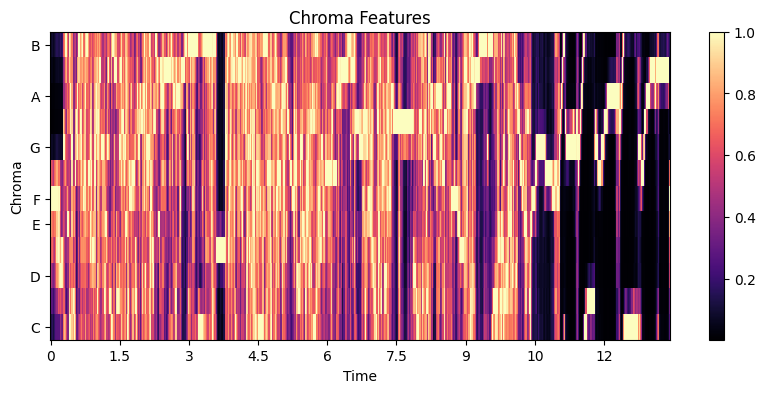

In [10]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Define the path to the directory containing the audio files
directory_path = './Emo-soundscapes'

# Define the pickle file paths
buffers_pkl_path = 'buffers.pkl'
chroma_pkl_path = 'chroma.pkl'

# Check if the pickle files exist
if os.path.exists(buffers_pkl_path) and os.path.exists(chroma_pkl_path):
    # Load buffers and chroma features from pickle files
    with open(buffers_pkl_path, 'rb') as f:
        buffers = pickle.load(f)
    with open(chroma_pkl_path, 'rb') as f:
        chroma_list = pickle.load(f)
    print("Loaded buffers and chroma features from pickle files.")
else:
    # Initialize an empty list to store the buffers and their chroma features
    buffers = []
    chroma_list = []

    # Walk through the directory, including all subdirectories
    for root, _, files in os.walk(directory_path):
        for filename in files:
            if filename.endswith(".wav") or filename.endswith(".mp3"):
                # Construct the full file path
                file_path = os.path.join(root, filename)
                try:
                    # Load the audio file
                    audio_data, sample_rate = librosa.load(file_path, sr=None)
                    
                    # Compute the chroma features
                    chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
                    
                    # Append the buffer and chroma features to the lists
                    buffers.append((audio_data, sample_rate))
                    chroma_list.append(chroma)
                    
                    print(f"Processed file: {file_path}")
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")

    # Save buffers to a file using pickle
    with open(buffers_pkl_path, 'wb') as f:
        pickle.dump(buffers, f)
    with open(chroma_pkl_path, 'wb') as f:
        pickle.dump(chroma_list, f)

    print("Processed audio files and saved buffers and chroma features to pickle files.")

# Check if chroma_list is empty
if not chroma_list:
    print("No valid audio files found or processed.")
else:
    # Visualizing the chroma features for the first audio file
    chroma_example = chroma_list[0]  # Use the first audio file for visualization

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma_example, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chroma Features')
    plt.xlabel('Time')
    plt.ylabel('Chroma')
    plt.show()


Processed file: ./Emo-soundscapes/Emo-Soundscapes-Audio/613_MixedSounds/mix(A+B+C)betweenSchafer'sCategories/mix_between_human_nature_quiet_1-6_1-6_1-6.wav
Processed file: ./Emo-soundscapes/Emo-Soundscapes-Audio/613_MixedSounds/mix(A+B+C)betweenSchafer'sCategories/mix_between_human_mechanical_society_1-12_1-6_1-12.wav
Processed file: ./Emo-soundscapes/Emo-Soundscapes-Audio/613_MixedSounds/mix(A+B+C)betweenSchafer'sCategories/mix_between_indicator_mechanical_quiet_1-6_1-6_1-6.wav
Processed file: ./Emo-soundscapes/Emo-Soundscapes-Audio/613_MixedSounds/mix(A+B+C)betweenSchafer'sCategories/mix_between_human_quiet_society_1-12_1-12_1-6.wav
Processed file: ./Emo-soundscapes/Emo-Soundscapes-Audio/613_MixedSounds/mix(A+B+C)betweenSchafer'sCategories/mix_between_human_nature_quiet_1-6_1-12_1-6.wav
Processed file: ./Emo-soundscapes/Emo-Soundscapes-Audio/613_MixedSounds/mix(A+B+C)betweenSchafer'sCategories/mix_between_human_mechanical_society_1-6_1-6_1-6.wav
Processed file: ./Emo-soundscapes/Emo-

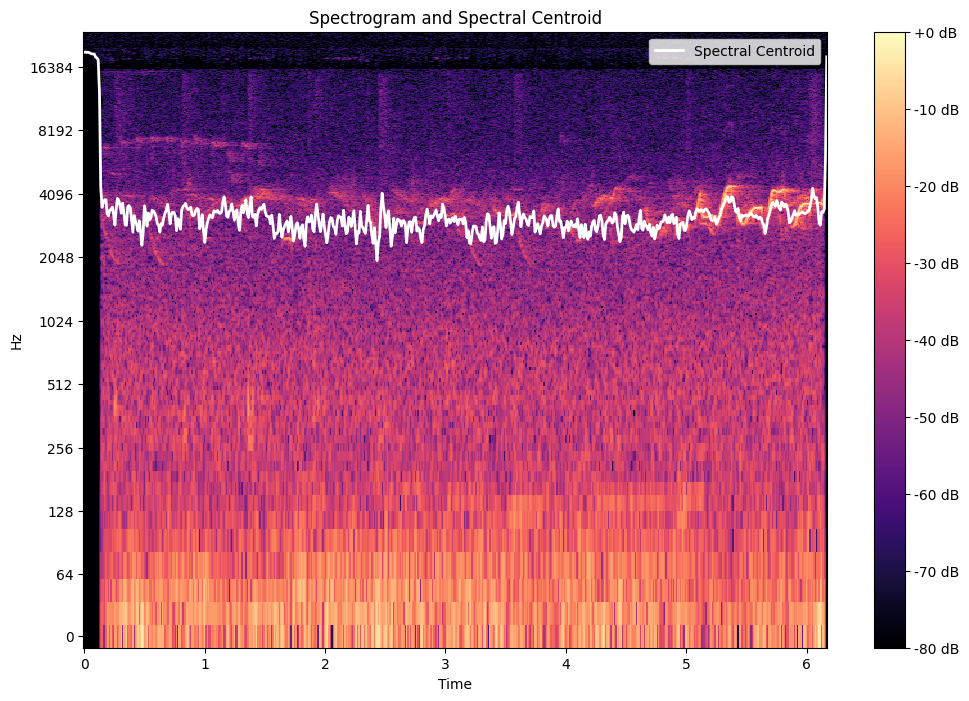

In [7]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the directory containing the audio files
directory_path = './Emo-soundscapes'

# Initialize an empty list to store the buffers and their spectral centroids
buffers = []

# Walk through the directory, including all subdirectories
for root, _, files in os.walk(directory_path):
    for filename in files:
        if filename.endswith(".wav") or filename.endswith(".mp3"):
            # Construct the full file path
            file_path = os.path.join(root, filename)
            try:
                # Load the audio file
                audio_data, sample_rate = librosa.load(file_path, sr=None)

                # Compute the spectral centroid
                spectral_centroids = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate)
                spectral_centroid_mean = np.mean(spectral_centroids)  # Take the mean of the spectral centroid
                
                # Append the buffer and spectral centroid to the lists
                buffers.append((audio_data, sample_rate, spectral_centroids))
                
                print(f"Processed file: {file_path}")
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

# If there are buffers, plot the spectrogram and spectral centroid of the first audio file
if buffers:
    audio_data, sample_rate, spectral_centroids = buffers[0]

    # Generate a spectrogram
    plt.figure(figsize=(12, 8))
    S = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max)
    librosa.display.specshow(S, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram and Spectral Centroid')

    # Overlay the spectral centroid
    frames = range(len(spectral_centroids[0]))
    t = librosa.frames_to_time(frames, sr=sample_rate)
    plt.plot(t, spectral_centroids[0], color='w', linewidth=2, label='Spectral Centroid')
    plt.legend(loc='upper right')

    plt.show()


Loaded buffers and MFCCs from pickle files.


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

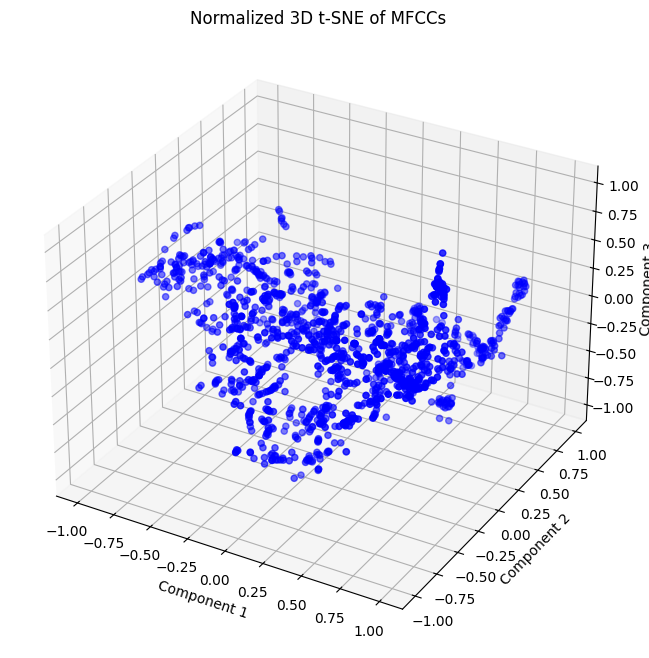

In [21]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.spatial import KDTree
import pickle

# Define the path to the directory containing the audio files
directory_path = './Emo-soundscapes'

# Define the pickle file paths
buffers_pkl_path = 'buffers.pkl'
mfccs_pkl_path = 'mfccs.pkl'

# Check if the pickle files exist
if os.path.exists(buffers_pkl_path) and os.path.exists(mfccs_pkl_path):
    # Load buffers and MFCCs from pickle files
    with open(buffers_pkl_path, 'rb') as f:
        buffers = pickle.load(f)
    with open(mfccs_pkl_path, 'rb') as f:
        mfccs_list = pickle.load(f)
    print("Loaded buffers and MFCCs from pickle files.")
else:
    # Initialize an empty list to store the buffers and their MFCCs
    buffers = []
    mfccs_list = []

    # Walk through the directory, including all subdirectories
    for root, _, files in os.walk(directory_path):
        for filename in files:
            if filename.endswith(".wav") or filename.endswith(".mp3"):
                # Construct the full file path
                file_path = os.path.join(root, filename)
                
                # Load the audio file
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                
                # Compute MFCCs
                mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
                mfccs_mean = np.mean(mfccs, axis=1)  # Take the mean of MFCCs along the time axis
                
                # Append the buffer and MFCCs to the lists
                buffers.append((audio_data, sample_rate))
                mfccs_list.append(mfccs_mean)

    # Save buffers to a file using pickle
    with open(buffers_pkl_path, 'wb') as f:
        pickle.dump(buffers, f)

    # Save MFCCs to a file using pickle
    with open(mfccs_pkl_path, 'wb') as f:
        pickle.dump(mfccs_list, f)

    print("Processed audio files and saved buffers and MFCCs to pickle files.")

# Convert the list of MFCCs to a NumPy array
mfccs_array = np.array(mfccs_list)

# Perform t-SNE to reduce dimensionality to 3D
tsne = TSNE(n_components=3, random_state=0)
mfccs_3d = tsne.fit_transform(mfccs_array)

# Normalize the 3D coordinates to fit within the range of -1 to +1
min_vals = mfccs_3d.min(axis=0)
max_vals = mfccs_3d.max(axis=0)
mfccs_3d_normalized = 2 * (mfccs_3d - min_vals) / (max_vals - min_vals) - 1

# Plot the normalized 3D t-SNE result
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(mfccs_3d_normalized[:, 0], mfccs_3d_normalized[:, 1], mfccs_3d_normalized[:, 2], c='blue', marker='o')

ax.set_title('Normalized 3D t-SNE of MFCCs')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()


Loaded buffers and MFCCs from pickle files.


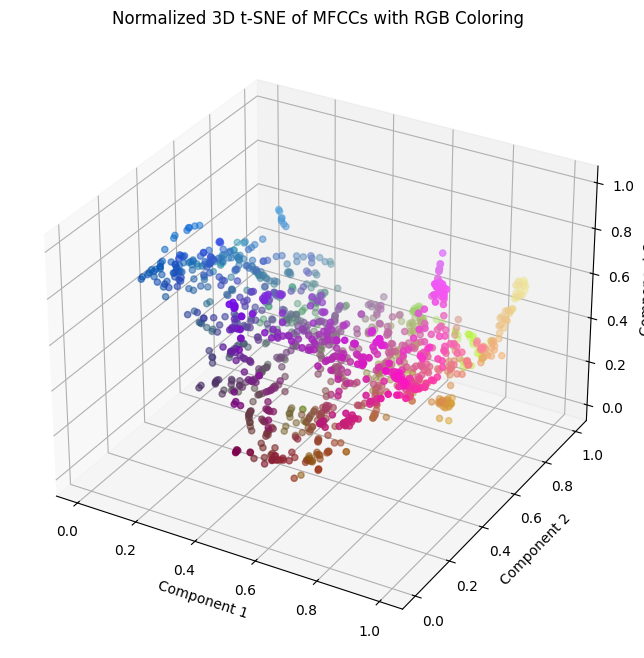

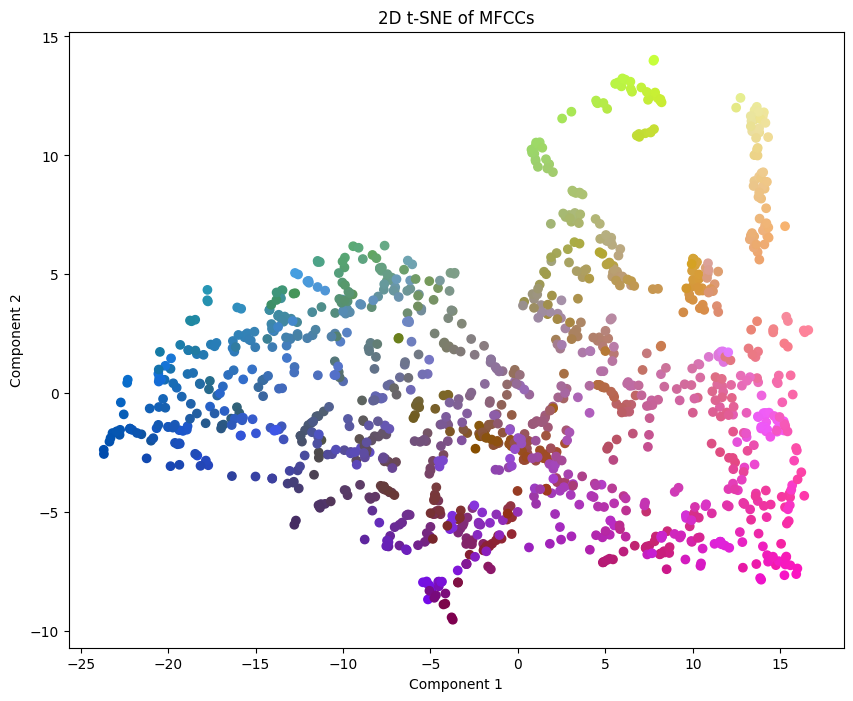

In [2]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.spatial import KDTree
import pickle

# Define the path to the directory containing the audio files
directory_path = './Emo-soundscapes'

# Define the pickle file paths
buffers_pkl_path = 'buffers.pkl'
mfccs_pkl_path = 'mfccs.pkl'

# Check if the pickle files exist
if os.path.exists(buffers_pkl_path) and os.path.exists(mfccs_pkl_path):
    # Load buffers and MFCCs from pickle files
    with open(buffers_pkl_path, 'rb') as f:
        buffers = pickle.load(f)
    with open(mfccs_pkl_path, 'rb') as f:
        mfccs_list = pickle.load(f)
    print("Loaded buffers and MFCCs from pickle files.")
else:
    # Initialize an empty list to store the buffers and their MFCCs
    buffers = []
    mfccs_list = []

    # Walk through the directory, including all subdirectories
    for root, _, files in os.walk(directory_path):
        for filename in files:
            if filename.endswith(".wav") or filename.endswith(".mp3"):
                # Construct the full file path
                file_path = os.path.join(root, filename)
                
                # Load the audio file
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                
                # Compute MFCCs
                mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
                mfccs_mean = np.mean(mfccs, axis=1)  # Take the mean of MFCCs along the time axis
                
                # Append the buffer and MFCCs to the lists
                buffers.append((audio_data, sample_rate))
                mfccs_list.append(mfccs_mean)

    # Save buffers to a file using pickle
    with open(buffers_pkl_path, 'wb') as f:
        pickle.dump(buffers, f)

    # Save MFCCs to a file using pickle
    with open(mfccs_pkl_path, 'wb') as f:
        pickle.dump(mfccs_list, f)

    print("Processed audio files and saved buffers and MFCCs to pickle files.")

# Convert the list of MFCCs to a NumPy array
mfccs_array = np.array(mfccs_list)

# Perform t-SNE to reduce dimensionality to 3D
tsne = TSNE(n_components=3, random_state=0)
mfccs_3d = tsne.fit_transform(mfccs_array)

# Normalize the 3D coordinates to fit within the range of 0 to 1 for RGB coloring
min_vals = mfccs_3d.min(axis=0)
max_vals = mfccs_3d.max(axis=0)
mfccs_3d_normalized = (mfccs_3d - min_vals) / (max_vals - min_vals)

# Plot the normalized 3D t-SNE result with RGB coloring
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(mfccs_3d_normalized[:, 0], mfccs_3d_normalized[:, 1], mfccs_3d_normalized[:, 2], 
                c=mfccs_3d_normalized, marker='o')

ax.set_title('Normalized 3D t-SNE of MFCCs with RGB Coloring')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(mfccs_3d[:, 0], mfccs_3d[:, 1], c=mfccs_3d_normalized, marker='o')
ax.set_title('2D t-SNE of MFCCs')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

plt.show()


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

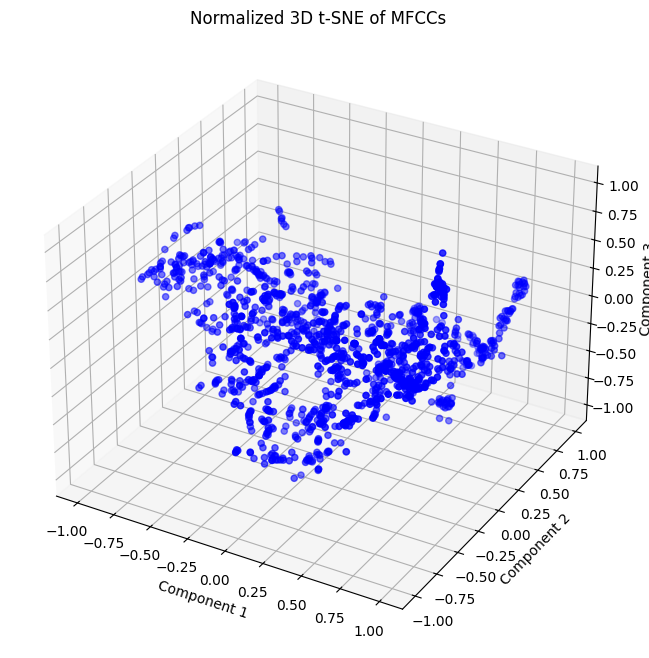

In [20]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.spatial import KDTree

# Define the path to the directory containing the audio files
directory_path = './Emo-soundscapes'

# Initialize an empty list to store the buffers and their MFCCs
buffers = []
mfccs_list = []

# Walk through the directory, including all subdirectories
for root, _, files in os.walk(directory_path):
    for filename in files:
        if filename.endswith(".wav") or filename.endswith(".mp3"):
            # Construct the full file path
            file_path = os.path.join(root, filename)
            
            # Load the audio file
            audio_data, sample_rate = librosa.load(file_path, sr=None)
            
            # Compute MFCCs
            mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
            mfccs_mean = np.mean(mfccs, axis=1)  # Take the mean of MFCCs along time axis
            
            # Append the buffer and MFCCs to the lists
            buffers.append((audio_data, sample_rate))
            mfccs_list.append(mfccs_mean)

# Convert the list of MFCCs to a NumPy array
mfccs_array = np.array(mfccs_list)

# Perform t-SNE to reduce dimensionality to 3D
tsne = TSNE(n_components=3, random_state=0)
mfccs_3d = tsne.fit_transform(mfccs_array)

# Normalize the 3D coordinates to fit within the range of -1 to +1
min_vals = mfccs_3d.min(axis=0)
max_vals = mfccs_3d.max(axis=0)
mfccs_3d_normalized = 2 * (mfccs_3d - min_vals) / (max_vals - min_vals) - 1

# Plot the normalized 3D t-SNE result
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(mfccs_3d_normalized[:, 0], mfccs_3d_normalized[:, 1], mfccs_3d_normalized[:, 2], c='blue', marker='o')

ax.set_title('Normalized 3D t-SNE of MFCCs')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()


Number of audio buffers loaded: 1321


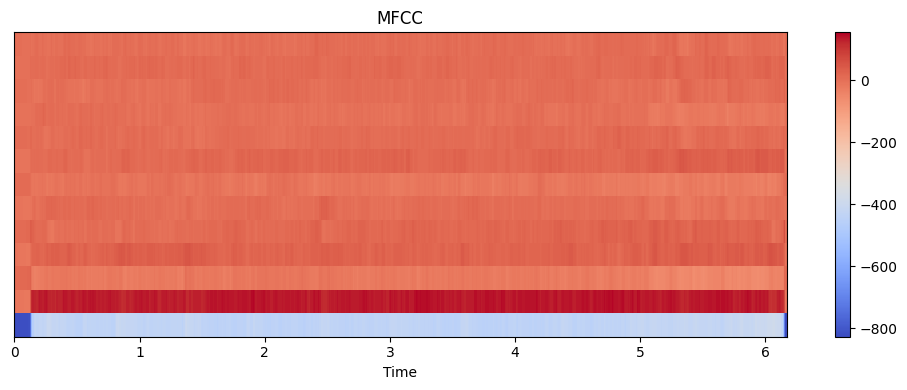

In [10]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the directory containing the audio files
directory_path = './Emo-soundscapes'

# Initialize an empty list to store the buffers
buffers = []

# Walk through the directory, including all subdirectories
for root, _, files in os.walk(directory_path):
    for filename in files:
        if filename.endswith(".wav") or filename.endswith(".mp3"):
            # Construct the full file path
            file_path = os.path.join(root, filename)
            
            # Load the audio file
            audio_data, sample_rate = librosa.load(file_path, sr=None)
            
            # Append the buffer to the list
            buffers.append((audio_data, sample_rate))

# Convert the list of buffers to a NumPy array
buffers_array = np.array(buffers, dtype=object)

# Optionally, print the shape of the buffers array to verify
print("Number of audio buffers loaded:", len(buffers))

# Perform MFCC analysis on the first audio buffer
audio_data, sample_rate = buffers[0]
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)

# Plot the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

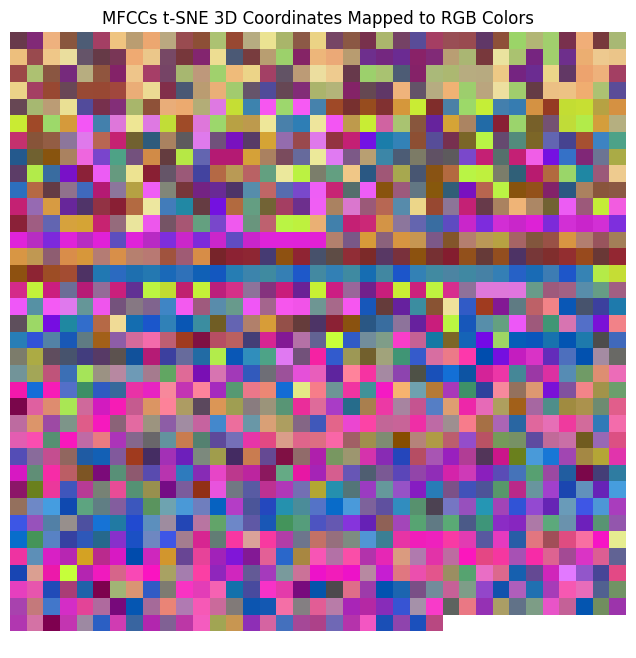

In [15]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Define the path to the directory containing the audio files
directory_path = './Emo-soundscapes'

# Initialize an empty list to store the buffers and their MFCCs
buffers = []
mfccs_list = []

# Walk through the directory, including all subdirectories
for root, _, files in os.walk(directory_path):
    for filename in files:
        if filename.endswith(".wav") or filename.endswith(".mp3"):
            # Construct the full file path
            file_path = os.path.join(root, filename)
            
            # Load the audio file
            audio_data, sample_rate = librosa.load(file_path, sr=None)
            
            # Compute MFCCs
            mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
            mfccs_mean = np.mean(mfccs, axis=1)  # Take the mean of MFCCs along time axis
            
            # Append the buffer and MFCCs to the lists
            buffers.append((audio_data, sample_rate))
            mfccs_list.append(mfccs_mean)

# Convert the list of MFCCs to a NumPy array
mfccs_array = np.array(mfccs_list)

# Perform t-SNE to reduce dimensionality to 3D
tsne = TSNE(n_components=3, random_state=0)
mfccs_3d = tsne.fit_transform(mfccs_array)

# Normalize the 3D coordinates to fit within the range of 0 to 1
min_vals = mfccs_3d.min(axis=0)
max_vals = mfccs_3d.max(axis=0)
mfccs_3d_normalized = (mfccs_3d - min_vals) / (max_vals - min_vals)

# Map the normalized coordinates to RGB values
colors = mfccs_3d_normalized

# Determine the grid size for the 2D visualization
grid_size = int(np.ceil(np.sqrt(len(colors))))
padded_colors = np.pad(colors, ((0, grid_size**2 - len(colors)), (0, 0)), mode='constant', constant_values=1.0)
color_grid = padded_colors.reshape((grid_size, grid_size, 3))

# Plot the colors as a 2D image
plt.figure(figsize=(8, 8))
plt.imshow(color_grid)
plt.axis('off')
plt.title('MFCCs t-SNE 3D Coordinates Mapped to RGB Colors')
plt.show()
